In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

Dieses Notebook lehnt an an ein Beispiel aus [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

# Binäre Klassifikation 
## Zweck
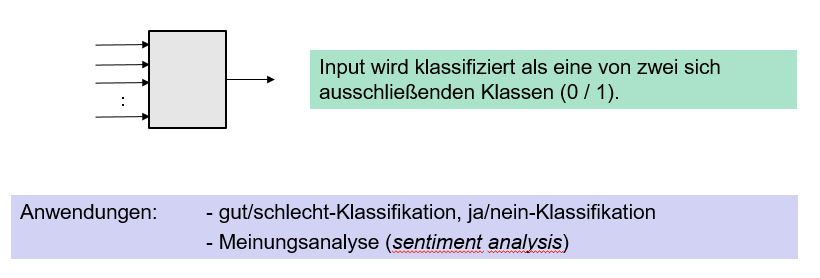

## Beispiel: Klassifikation von Filmbewertungen 
### Idee
Im folgenden Beispiel soll anhand der Worte des Bewertungstextes vorausgesagt werden, wie ein Film bewertet wird (gut/schlecht).
### Daten
Die Daten für das Training und die Validation des Klassifikators, stammen aus dem IMDB-Dataset (Int. Movie Database).  
Die Daten (50.000 reviews) werden aufgeteilt : 25.000 für das Training und 25.000 für den Test.  
Die Daten enthalten 50% gute und 50% schlechte reviews. 
Der IMDB-Datensatz ist im Keras-Paket enthalten.

---


### Laden des IMDB-Datensatzes

Das Argument `num_words=10000` beschränkt den Wortschatz auf die 10.000 häufigsten Worte.
Selten gebrauchte Worte werden aus dem Datensatz entfernt.  

Die Trainings- und Testdaten ('train_data', 'test_data') sind Listen von Reviews. 
Jedes Review ist wiederum eine Liste von Wortindizes, von Worten die im Review vorkommen. 
Die Bedeutung der Labels ist: 0=schlechtes review, 1=gutes review

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


### Informationen zum Datensatz

In [4]:
# Beispiel: Gebe Informationen zum 1. Review an.
print('Anzahl der Worte:', len(train_data[0]))
print('Die Indizes der ersten 5 Worte sind:', train_data[0][0:5])

Anzahl der Worte: 218
Die Indizes der ersten 5 Worte sind: [1, 14, 22, 16, 43]


In [5]:
# Beispiel: Gebe die Bewerungen der ersten 10 Reviews an:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

### Rückübersetzung der Reviews

In [6]:
# word_index ist ein Dictionary , das Worte auf Integerwerte abbildet (Beispiel: 'the':1).
word_index = imdb.get_word_index()

# Gib den Wortindex von 'adventure' aus.
print("Der Wortindex des Wortes 'adventure' ist:", word_index['adventure'])

# Erzeuge ein invertiertes Dictionary, welches Integerwerte auf Worte abbildet.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Gib den Wortindex von 'adventure' aus.
print("Das Wort mit dem Index 1 ist:", reverse_word_index[1])

for i in range(1,20):
    print("%5d   %s"  %  (i, reverse_word_index[i]))

1646592/1641221 [==============================] - 1s 0us/step
Der Wortindex des Wortes 'adventure' ist: 1151
Das Wort mit dem Index 1 ist: the
    1   the
    2   and
    3   a
    4   of
    5   to
    6   is
    7   br
    8   in
    9   it
   10   i
   11   this
   12   that
   13   was
   14   as
   15   for
   16   with
   17   movie
   18   but
   19   film


In [7]:
train_data[2][3:13]

[8, 30, 31, 7, 4, 249, 108, 7, 4, 5974]

In [8]:
# Die Indizes haben einen Offset von 3, da die ersten 3 Indizes reserviert sind
# für die Schlüsselworte "padding", "start of sequence", und "unknown".

Offset     = 3
NumOfWords = 10

for i in train_data[2][Offset:Offset+NumOfWords]:
    print("%5d   %s"  %  (i-Offset, reverse_word_index[i-Offset]))

    5   to
   27   be
   28   one
    4   of
    1   the
  246   worst
  105   films
    4   of
    1   the
 5971   1990s


## Aufbereitung der Daten

Da nicht einfach die Wortindizes eines Reviews als Input verwendet werden können,
muss das Review in ein Vektor fester Länge umgewandelt werden. 

* Ein Inputvektor ist genau ein Review. 
* Ein Inputvektor ist 10000-dimensional. 
* Jedes Feld im Inputvektor steht genau für ein Wort aus einem Dictionary mit 10000 Worten.  
* Eine 1 bedeutet, das Wort kommt im Review vor.
* Alle Trainingsdaten zusammen bilden eine Matrix aus 25.000 Inputvektoren der Dimension 10000.

#### Vektorisierung der Input-Daten

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Erzeuge eine Null-Matrix der Form (Anzahl der Reviews, Dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results


# Vektorisierte Trainingsdaten
x_train = vectorize_sequences(train_data)
# Vektorisierte Testdaten
x_test = vectorize_sequences(test_data)

Hier die ersten 15 Einträge (Worte) des 1. Reviews .....

In [27]:
x_train[0,0:15]

array([ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.])

#### Vektorisierung der Labels

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')
print(train_labels)

# Hier die Bewertungen der ersten 5 Reviews ...
print('y_train[0:5] =',y_train[0:10])

[1 0 0 ..., 0 1 0]
y_train[0:5] = [ 1.  0.  0.  1.  0.  0.  1.  0.  1.  0.]


# ??? Frage

Geben Sie den Inputvektor für das folgende Review an:  
"this movie is a film"

In [31]:
print("Der Wortindex des Wortes 'this' ist:", word_index['this'])
# Gib den Wortindex von 'adventure' aus.
print("Der Wortindex des Wortes 'movie' ist:", word_index['movie'])
# Gib den Wortindex von 'adventure' aus.
print("Der Wortindex des Wortes 'is' ist:", word_index['is'])
# Gib den Wortindex von 'adventure' aus.
print("Der Wortindex des Wortes 'a' ist:", word_index['a'])
# Gib den Wortindex von 'adventure' aus.
print("Der Wortindex des Wortes 'film' ist:", word_index['film'])

rew = np.zeros((1,5), dtype=int)
# Gib den Wortindex von 'adventure' aus.
rew[0,0] = word_index['this']
rew[0,1] = word_index['movie']
rew[0,2] = word_index['is']
rew[0,3] = word_index['a']
rew[0,4] = word_index['film']
print('rew = ',rew[0])

Der Wortindex des Wortes 'this' ist: 11
Der Wortindex des Wortes 'movie' ist: 17
Der Wortindex des Wortes 'is' ist: 6
Der Wortindex des Wortes 'a' ist: 3
Der Wortindex des Wortes 'film' ist: 19
rew =  [11 17  6  3 19]


In [32]:
x_rew = vectorize_sequences(rew)
x_rew[0,0:20]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.])

## Erstellen des Netzwerks

Wir starten mit folgendem Netzwerk .....

* 3 hidden Layer
* Neuronenzahl der hidden Layer:           64   - 32   - 16
* Aktivierungsfunktionen der hidden Layer: relu - relu - sigmoid

In [34]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(units=64, activation ='relu', input_shape=(10000,)))
#model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=32, activation ='relu'))
#model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=16, activation ='relu'))
#model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=1, activation  ='sigmoid'))

# ??? Frage

Berechnen Sie die Anzahl der zu trainierenden Parameter.

In [35]:
input_anzahl = 10000 * 64 + 64    # input_shape mal Neuronen vom 1ten Layer plus Neuronen vom 1tes Layer
param_anzahl = 64 * 32 + 32       # Neuronen vom erten Layer mal Neuronen vom 2ten Layer plus Neuronen vom zweiten Layer
param_anzahl2 = 32 * 16 + 16      # Neuronen vom 2ten Layer mal Neuronen vom 3ten Layer plus Neuronen vom 3ten Layer
param_anzahl3 = 16 * 1 + 1        # Neuronen vom 3ten Layer mal Neuronen vom output Layer plus Neuronen vom output Layer
param_anzahl_gesamt = input_anzahl + param_anzahl + param_anzahl2 + param_anzahl3
print(param_anzahl_gesamt)

642689


### Typisch für binäre Klassifikatoren ist : 
* **sigmoid** Aktivierungsfunktion im Outputlayer
* Kostenfunktion:  **binary_crossentropy **

In [36]:
model.compile(optimizer = 'rmsprop',                # rmsprop, adam
              loss      = 'binary_crossentropy',    # mse, binary_crossentropy
              metrics   = ['accuracy'])

## Training und Validierung Neuronalen Netzes 


In [37]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 20,
                    batch_size      = 128,
                    validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 317us/step - loss: 0.3437 - acc: 0.8530 - val_loss: 0.2868 - val_acc: 0.8820
Epoch 2/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.2014 - acc: 0.9211 - val_loss: 0.3250 - val_acc: 0.8746
Epoch 3/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.1461 - acc: 0.9450 - val_loss: 0.3617 - val_acc: 0.8731
Epoch 4/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.0967 - acc: 0.9646 - val_loss: 0.4674 - val_acc: 0.8689
Epoch 5/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.0582 - acc: 0.9812 - val_loss: 0.5905 - val_acc: 0.8681
Epoch 6/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.0351 - acc: 0.9911 - val_loss: 0.7118 - val_acc: 0.8644
Epoch 7/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.0221 - acc: 0.9952 - val_loss: 0.8363 - 

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Ausgegeben werden der Loss und die Accuracy der Trainings- und Testdaten

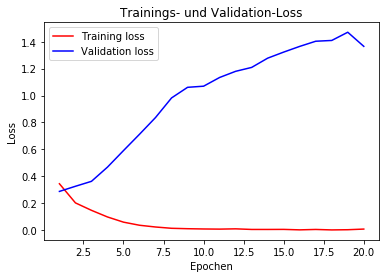

In [41]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss,     'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainings- und Validation-Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()

plt.show()

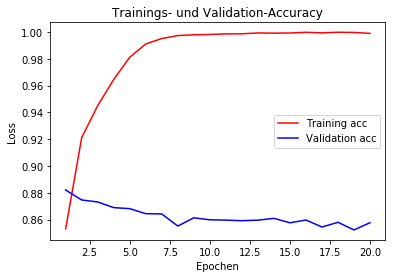

In [42]:
plt.clf()   # clear figure
acc_values     = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc,     'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainings- und Validation-Accuracy')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Klassifikation neuer Daten

Neue Daten (Reviews) können mit der predict-Methode klassifiziert werden.

In [43]:
# model.predict(x_train[0:5]).T.astype(int)
model.predict(x_test[0:10])

array([[  2.76216697e-02],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  9.99991417e-01],
       [  1.00000000e+00],
       [  7.92640264e-20],
       [  1.00000000e+00],
       [  1.00000000e+00]], dtype=float32)

# ??? Fragen

* Zeigt das NN beim Training die Tendenz zum Overfitting?
    * Loss der Trainingsdaten wird kleiner und der Loss der Testdaten nimmt zu, was ein Indiz für Overfitting ist
* Woran erkennt man das?
    * An dem Graphen der Loss-Daten
* Welche Maßnahmen gibt es zur Verbesserung des Overfitting?
    * Zahl der Neuronen verkleinern, Netz vereinfachen
    * Early stopping
    * Regularisierung (z.B. weight decay
    * Drop out Layer



# !!! Aufgaben

### a) Trainieren Sie folgende Varianten des vorgegebenen Neuronalen Netzes:

1. Nur 2 hidden Layer (mit 16/16 Neuronen)
2. Andere Loss-Funktion: "mse" statt "binary_crossentropy"
3. tanh-Aktivierungsfunktion in den hidden Layern
4. Andere Trainingsstrategie als 'rmsprop' : 'adam'
5. Dropout
6. Erstellen Sie einen besonders guten Klassifikator !

### b)  Dokumentieren Sie die Ergebnisse 
* Endergebnis
* graph. Traingsverläufe
* Kommentar (gibt es Overfitting, was ist besser)




In [46]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(units=16, activation ='tanh', input_shape=(10000,)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=16, activation ='tanh'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=1, activation  ='sigmoid'))

In [47]:
model.compile(optimizer = 'adam',                # rmsprop, adam
              loss      = 'mse',    # mse, binary_crossentropy
              metrics   = ['accuracy'])

In [48]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 20,
                    batch_size      = 128,
                    validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 157us/step - loss: 0.1325 - acc: 0.8220 - val_loss: 0.0845 - val_acc: 0.8862
Epoch 2/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.0712 - acc: 0.9124 - val_loss: 0.0883 - val_acc: 0.8822
Epoch 3/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.0585 - acc: 0.9282 - val_loss: 0.0943 - val_acc: 0.8788
Epoch 4/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.0511 - acc: 0.9370 - val_loss: 0.0989 - val_acc: 0.8756
Epoch 5/20
25000/25000 [==============================] - 4s 178us/step - loss: 0.0449 - acc: 0.9462 - val_loss: 0.1019 - val_acc: 0.8749
Epoch 6/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.0405 - acc: 0.9521 - val_loss: 0.1051 - val_acc: 0.8732
Epoch 7/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.0384 - acc: 0.9545 - val_loss: 0.1095 - 

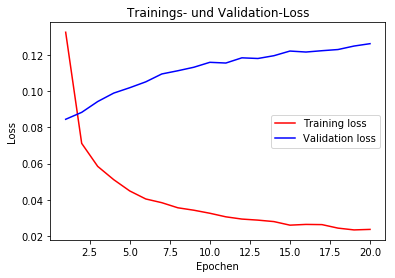

In [49]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss,     'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainings- und Validation-Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()

plt.show()

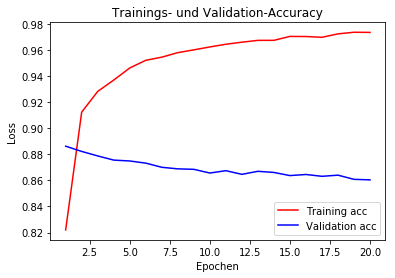

In [50]:
plt.clf()   # clear figure
acc_values     = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc,     'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainings- und Validation-Accuracy')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()

plt.show()